# Medical Expenses Prediction Project
### Author: Khribech Bouchaib
### Date: 2024-11-21
### Description: Predicting annual medical expenses using regression models.

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [5]:

# File path to the dataset
file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance.csv"

# Load the dataset
try:
    insurance_df = pd.read_csv(file_path)
    print("Dataset successfully loaded. Here's a preview:")
    print(insurance_df.head())
except Exception as e:
    print(f"Error loading dataset: {e}")


Dataset successfully loaded. Here's a preview:
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


# Exploratory Data Analysis (EDA)

In [4]:
# Function for Exploratory Data Analysis (EDA)
def perform_eda(df):
    print("Dataset Information:")
    df.info()

    print("\nSummary Statistics:")
    print(df.describe())

    print("\nMissing Values:")
    print(df.isnull().sum())

    # Plot distributions for numerical variables
    numerical_features = ['age', 'bmi', 'expenses']
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature], kde=True)
        plt.title(f"Distribution of {feature}")
        plt.show()

    # Boxplots for categorical variables
    categorical_features = ['sex', 'smoker', 'region']
    for feature in categorical_features:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=feature, y='expenses', data=df)
        plt.title(f"Expenses by {feature}")
        plt.show()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Summary Statistics:
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.

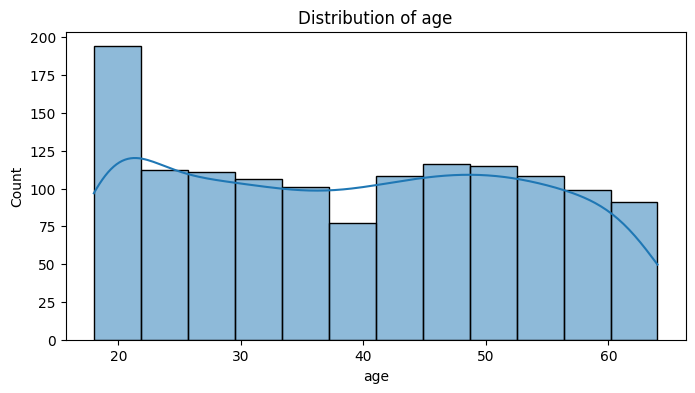

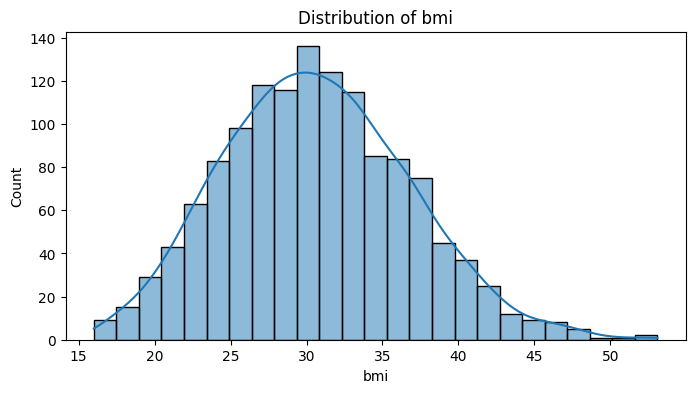

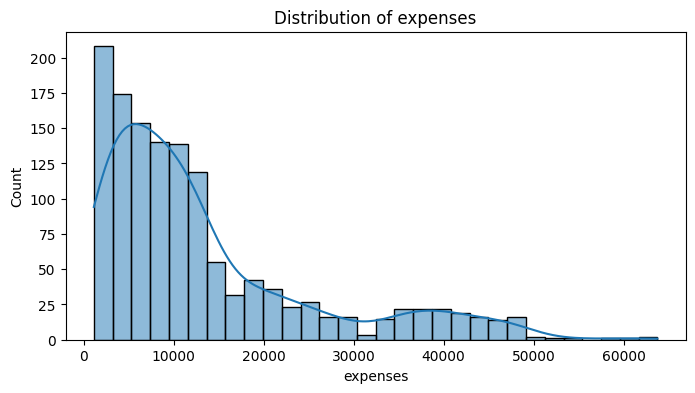

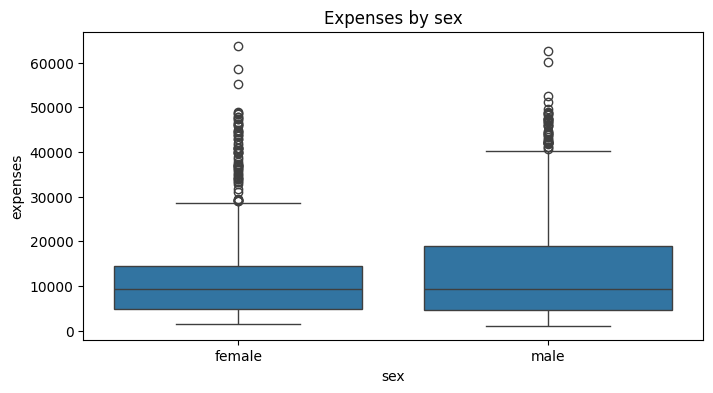

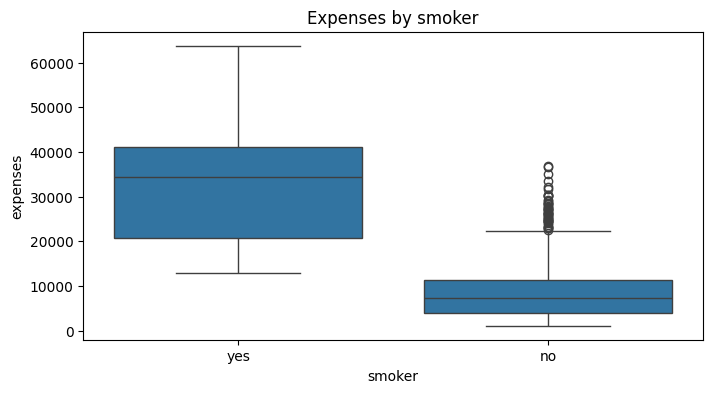

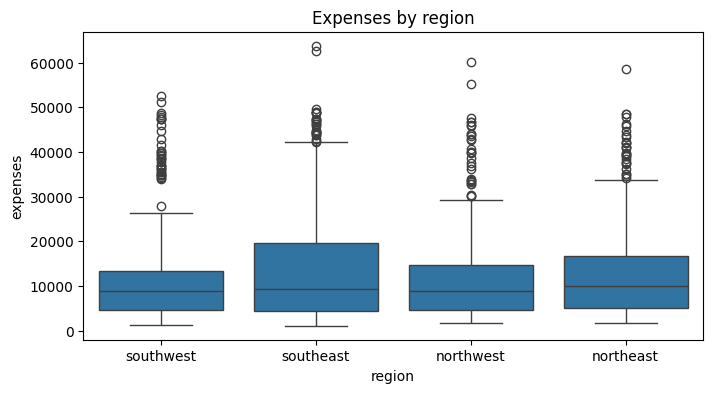

In [6]:
# Perform EDA on the insurance dataset
perform_eda(insurance_df)


Key Observations from the Dataset Exploration:
Dataset Information:
Total Records: 1,338
Columns: 7
Numerical Columns: age, bmi, children, expenses
Categorical Columns: sex, smoker, region
No missing values.
Summary Statistics:
Age:
Average: 39 years
Minimum: 18 years
Maximum: 64 years
BMI:
Average: 30.66 (overweight threshold for BMI is 25).
Expenses:
Highly skewed with a few individuals having very high expenses.
Distribution Insights:
Age:
Uniform distribution across age groups.
BMI:
Follows a bell curve, with most individuals having a BMI of 25–35.
Expenses:
Right-skewed, with the majority incurring lower expenses but a few outliers with very high expenses.
Boxplots for Categorical Features:
Gender (sex):
Similar expense distributions for males and females.
Smoker (smoker):
Smokers have significantly higher medical expenses compared to non-smokers.
Region (region):
No significant regional difference in expenses.

### Function: Check Missing Values

In [9]:
def check_missing_values(df):
    """
    Check for missing values in the DataFrame.
    """
    print("Checking for Missing Values...")
    missing_values = df.isnull().sum()
    print(missing_values)
    print("\nTotal Missing Values:", missing_values.sum())
    return missing_values


### 2. Function: Detect Outliers

In [11]:
def detect_outliers(df, numerical_columns):
    """
    Detect outliers for numerical columns using the IQR method.
    """
    print("\nDetecting Outliers...")
    outlier_info = {}
    
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)  # First quartile
        Q3 = df[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = len(outliers)
        
        print(f"Column: {column}")
        print(f"  - Lower Bound: {lower_bound}")
        print(f"  - Upper Bound: {upper_bound}")
        print(f"  - Outliers Detected: {outlier_count}")
        
        outlier_info[column] = outlier_count
    
    return outlier_info


In [12]:
def check_normality(df, numerical_columns):
    """
    Check if numerical columns are normalized (range between 0 and 1).
    """
    print("\nChecking Data Normality...")
    for column in numerical_columns:
        min_value = df[column].min()
        max_value = df[column].max()
        if not (0 <= min_value <= 1 and 0 <= max_value <= 1):
            print(f"Column '{column}' is NOT normalized. (Min: {min_value}, Max: {max_value})")
        else:
            print(f"Column '{column}' is normalized.")


In [15]:
def check_mixed_types(df):
    """
    Check if any column contains both numeric and object values.
    """
    print("\nChecking for Mixed Data Types...")
    mixed_columns = []
    for column in df.columns:
        if df[column].apply(type).nunique() > 1:
            mixed_columns.append(column)
            print(f"Column '{column}' has mixed data types.")
    if not mixed_columns:
        print("No columns with mixed data types detected.")
    return mixed_columns


In [17]:
# 1. Check Missing Values
missing_values = check_missing_values(insurance_df)

# 2. Detect Outliers
numerical_columns = ['age', 'bmi', 'expenses']
outliers = detect_outliers(insurance_df, numerical_columns)

# 3. Check Data Normality
check_normality(insurance_df, numerical_columns)

# 4. Check for Mixed Data Types
mixed_columns = check_mixed_types(insurance_df)




Checking for Missing Values...
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Total Missing Values: 0

Detecting Outliers...
Column: age
  - Lower Bound: -9.0
  - Upper Bound: 87.0
  - Outliers Detected: 0
Column: bmi
  - Lower Bound: 13.699999999999998
  - Upper Bound: 47.300000000000004
  - Outliers Detected: 9
Column: expenses
  - Lower Bound: -13109.15375
  - Upper Bound: 34489.35625
  - Outliers Detected: 139

Checking Data Normality...
Column 'age' is NOT normalized. (Min: 18, Max: 64)
Column 'bmi' is NOT normalized. (Min: 16.0, Max: 53.1)
Column 'expenses' is NOT normalized. (Min: 1121.87, Max: 63770.43)

Checking for Mixed Data Types...
No columns with mixed data types detected.


Findings:
Missing Values:

No missing values detected. No further action is needed.
Outliers:

bmi: 9 outliers were detected.
expenses: 139 outliers were detected. These are likely significant since medical expenses often vary widely.
Normalization:

expenses is not normalized. It has a range from 1121.87 to 63770.43. We may need to normalize this column for model training.
Mixed Data Types:

No columns with mixed data types. Data types are consistent.

# Full Preprocessing Function

In [18]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def preprocess_data(df, numerical_columns, categorical_columns, target_column, remove_outliers=True, normalize=True):
    """
    Preprocess the dataset:
    1. Checks and reports missing values.
    2. Handles outliers (optional).
    3. Normalizes numerical columns (optional).
    4. Encodes categorical variables.
    5. Splits features and target for model training.

    Parameters:
    - df (DataFrame): The dataset.
    - numerical_columns (list): List of numerical column names.
    - categorical_columns (list): List of categorical column names.
    - target_column (str): The target column name.
    - remove_outliers (bool): Whether to remove outliers using the IQR method.
    - normalize (bool): Whether to normalize numerical columns.

    Returns:
    - X_train, X_test, y_train, y_test: Train-test split data.
    """
    print("Starting preprocessing...")

    # 1. Check for Missing Values
    print("\nChecking for Missing Values...")
    missing_values = df.isnull().sum()
    print(missing_values)
    if missing_values.sum() > 0:
        print("No missing values detected.")

    # 2. Handle Outliers
    if remove_outliers:
        print("\nHandling Outliers...")
        for column in numerical_columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out rows with outliers
            before = len(df)
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
            after = len(df)
            print(f"Column '{column}': Removed {before - after} outliers.")

    # 3. Normalize Numerical Columns
    if normalize:
        print("\nNormalizing Numerical Columns...")
        scaler = MinMaxScaler()
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
        print(f"Normalized Columns: {numerical_columns}")

    # 4. Encode Categorical Variables
    print("\nEncoding Categorical Variables...")
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    print(f"Encoded Columns: {categorical_columns}")

    # 5. Split Features and Target
    print("\nSplitting Features and Target...")
    X = df_encoded.drop(target_column, axis=1)
    y = df_encoded[target_column]

    # Train-Test Split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Preprocessing completed successfully.")
    return X_train, X_test, y_train, y_test


In [19]:
# Define the columns
numerical_columns = ['age', 'bmi', 'expenses']
categorical_columns = ['sex', 'smoker', 'region']
target_column = 'expenses'

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(
    insurance_df.copy(),
    numerical_columns=numerical_columns,
    categorical_columns=categorical_columns,
    target_column=target_column,
    remove_outliers=True,
    normalize=True
)


Starting preprocessing...

Checking for Missing Values...
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Handling Outliers...
Column 'age': Removed 0 outliers.
Column 'bmi': Removed 9 outliers.
Column 'expenses': Removed 138 outliers.

Normalizing Numerical Columns...
Normalized Columns: ['age', 'bmi', 'expenses']

Encoding Categorical Variables...
Encoded Columns: ['sex', 'smoker', 'region']

Splitting Features and Target...
Preprocessing completed successfully.


# Train Models

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

def train_models(X_train, y_train):
    """
    Train Linear Regression and Random Forest models on the training data.
    
    Parameters:
    - X_train: Features for training.
    - y_train: Target for training.

    Returns:
    - lr_model: Trained Linear Regression model.
    - rf_model: Trained Random Forest model.
    """
    # Linear Regression
    print("Training Linear Regression Model...")
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    print("Linear Regression Model Trained Successfully.")
    
    # Random Forest Regressor
    print("\nTraining Random Forest Regressor...")
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    print("Random Forest Regressor Trained Successfully.")
    
    return lr_model, rf_model


# Evaluate Models

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_models(models, X_test, y_test):
    """
    Evaluate models on the test data and print their performance metrics.

    Parameters:
    - models: A dictionary of trained models.
    - X_test: Features for testing.
    - y_test: Target for testing.
    """
    print("\nEvaluating Models...")
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"\nModel: {model_name}")
        print(f"  - Mean Squared Error (MSE): {mse:.2f}")
        print(f"  - R² Score: {r2:.2f}")


In [23]:
# Train Models
lr_model, rf_model = train_models(X_train, y_train)

# Evaluate Models
models = {
    "Linear Regression": lr_model,
    "Random Forest Regressor": rf_model
}
evaluate_models(models, X_test, y_test)


Training Linear Regression Model...
Linear Regression Model Trained Successfully.

Training Random Forest Regressor...
Random Forest Regressor Trained Successfully.

Evaluating Models...

Model: Linear Regression
  - Mean Squared Error (MSE): 0.02
  - R² Score: 0.63

Model: Random Forest Regressor
  - Mean Squared Error (MSE): 0.02
  - R² Score: 0.62


# improved_pipeline


Adding Interaction Features...
Applying Log Transformation to Target Variable...

Tuning Random Forest Hyperparameters...
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Model Evaluation (Log Scale):
Train R²: 0.78
Test R²: 0.67

Model Evaluation (Original Scale):
Mean Squared Error (MSE): 0.02
R² Score: 0.65

Residual Analysis...


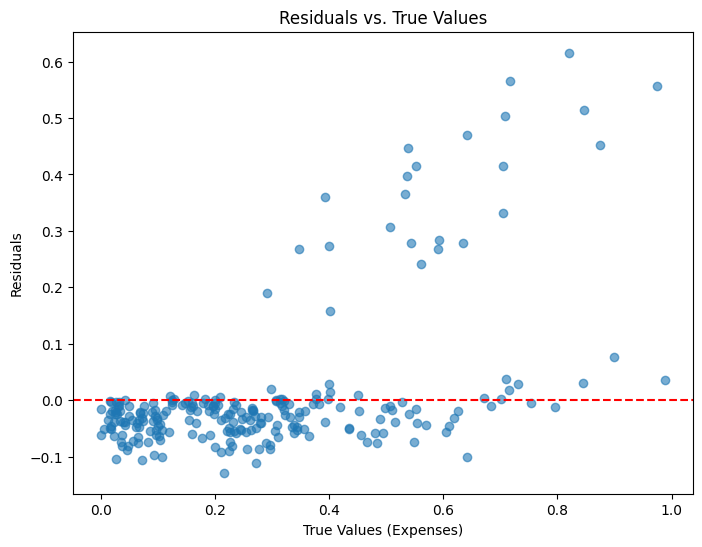

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Improved Preprocessing and Modeling Pipeline
def improved_pipeline(X_train, X_test, y_train, y_test):
    # Feature Engineering: Adding Interaction Features
    print("\nAdding Interaction Features...")
    X_train['bmi_smoker'] = X_train['bmi'] * X_train['smoker_yes']
    X_test['bmi_smoker'] = X_test['bmi'] * X_test['smoker_yes']

    # Log Transform the Target Variable
    print("Applying Log Transformation to Target Variable...")
    y_train_log = np.log1p(y_train)  # log(1 + y) to handle zero values
    y_test_log = np.log1p(y_test)

    # Train a Random Forest Regressor with Hyperparameter Tuning
    print("\nTuning Random Forest Hyperparameters...")
    rf_model = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }
    grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train_log)

    # Best Model
    best_rf_model = grid_search.best_estimator_
    print("\nBest Parameters for Random Forest:", grid_search.best_params_)

    # Predictions
    y_pred_train = best_rf_model.predict(X_train)
    y_pred_test = best_rf_model.predict(X_test)

    # Evaluate Model Performance
    print("\nModel Evaluation (Log Scale):")
    print(f"Train R²: {r2_score(y_train_log, y_pred_train):.2f}")
    print(f"Test R²: {r2_score(y_test_log, y_pred_test):.2f}")

    # Reverse Transformation (Exp) for Predictions
    y_pred_test_exp = np.expm1(y_pred_test)
    y_test_exp = np.expm1(y_test_log)

    print("\nModel Evaluation (Original Scale):")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_exp, y_pred_test_exp):.2f}")
    print(f"R² Score: {r2_score(y_test_exp, y_pred_test_exp):.2f}")

    # Residual Analysis
    print("\nResidual Analysis...")
    residuals = y_test_exp - y_pred_test_exp
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_exp, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residuals vs. True Values")
    plt.xlabel("True Values (Expenses)")
    plt.ylabel("Residuals")
    plt.show()

# Run the improved pipeline
improved_pipeline(X_train, X_test, y_train, y_test)
